# Single Cell RNA-Seq Velocity analysis using the loom files generated by kallisto Bustools

# Before, the cell IDs were changed in each loom file to match those in the seurat object from Anxo

# Specifically, in the first loom file (from MAD1), I added "-1" to all cell IDs and so on with the other loom files 

In [1]:
import loompy

In [2]:
 import h5py 

In [4]:
# Load the loom files
files = ["/Users/mohamedomar/Desktop/Looms/MAD1.loom", "/Users/mohamedomar/Desktop/Looms/MAD2.loom", "/Users/mohamedomar/Desktop/Looms/MAD3.loom", "/Users/mohamedomar/Desktop/Looms/MAD4.loom", "/Users/mohamedomar/Desktop/Looms/MAD5.loom", "/Users/mohamedomar/Desktop/Looms/MAD6.loom"]

In [309]:
#df = loompy.connect('/Users/mohamedomar/Desktop/Looms/MAD3.loom', validate=False)

In [3]:
#loompy.__version__

'3.0.6'

In [19]:
#df

In [25]:
#df.ra.keys()

['gene_name', 'var_names']

In [5]:
# Combine the loom files into a single one based on var_names (ensembel gene IDs)
loompy.combine(files, "Loom_Combined.loom", key = "var_names")

In [27]:
#df = loompy.connect('/Users/mohamedomar/Desktop/Loom_Combined.loom')

In [28]:
#df

In [30]:
#df.layers.keys()

['', 'spliced', 'unspliced']

In [3]:
import anndata

In [4]:
import scvelo as scv

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import matplotlib as plt

In [8]:
%load_ext rpy2.ipython

In [ ]:
# Load the combined loom file to play with
BigLoom = anndata.read_loom('/Users/mohamedomar/Desktop/Loom_Combined.loom') # Read the loom file

In [127]:
BigLoom  # Look at the loom file

AnnData object with n_obs × n_vars = 1516020 × 55421
    var: 'gene_name'
    layers: 'matrix', 'spliced', 'unspliced'

In [14]:
# Load the cell IDs from the epithelial seurat object
cellID_obs = pd.read_csv("cellID_obs.csv") # Read the cell IDs from the seurat object metadata

In [15]:
# Read the umap coordinates from the seurat object metadata
umap_cord = pd.read_csv("cell_embeddings.csv") 

In [16]:
# Read the clusters information from the seurat object metadata
cell_clusters = pd.read_csv("clusters.csv") 

In [128]:
# Look at the column names in the loom file (Cell IDs)
BigLoom.obs_names 

Index(['AAACCCAAGAAACCCA-1', 'AAACCCAAGAAAGTCT-1', 'AAACCCAAGAACAAGG-1',
       'AAACCCAAGAAGCCTG-1', 'AAACCCAAGAAGCGCT-1', 'AAACCCAAGAAGCTGC-1',
       'AAACCCAAGACAACAT-1', 'AAACCCAAGACAAGCC-1', 'AAACCCAAGACCAAGC-1',
       'AAACCCAAGACCATGG-1',
       ...
       'TTTGTTGTCTGGCCTT-6', 'TTTGTTGTCTGGGCGT-6', 'TTTGTTGTCTTACACT-6',
       'TTTGTTGTCTTCTGTA-6', 'TTTGTTGTCTTGGAAC-6', 'TTTGTTGTCTTGGGCG-6',
       'TTTGTTGTCTTGGTCC-6', 'TTTGTTGTCTTGTTAC-6', 'TTTGTTGTCTTTCCAA-6',
       'TTTGTTGTCTTTCTAG-6'],
      dtype='object', length=1516020)

In [274]:
#BigLoom.obs_names_make_unique()  # Make the cell ID unique  ????????????????????????? >> Don't do that

In [275]:
#BigLoom.obs_names # Look at the column names in the loom file (Cell IDs)

Index(['AAACCCAAGAAACCCA', 'AAACCCAAGAAAGTCT', 'AAACCCAAGAACAAGG',
       'AAACCCAAGAAGCCTG', 'AAACCCAAGAAGCGCT', 'AAACCCAAGAAGCTGC',
       'AAACCCAAGACAACAT', 'AAACCCAAGACAAGCC', 'AAACCCAAGACCAAGC',
       'AAACCCAAGACCATGG',
       ...
       'TTTGTTGTCTGGCCTT-5', 'TTTGTTGTCTGGGCGT-3', 'TTTGTTGTCTTACACT-5',
       'TTTGTTGTCTTCTGTA-1', 'TTTGTTGTCTTGGAAC-2', 'TTTGTTGTCTTGGGCG',
       'TTTGTTGTCTTGGTCC', 'TTTGTTGTCTTGTTAC', 'TTTGTTGTCTTTCCAA',
       'TTTGTTGTCTTTCTAG-4'],
      dtype='object', length=1516020)

In [129]:
BigLoom2 = BigLoom[np.isin(BigLoom.obs.index,cellID_obs["x"])] ## Filter the cells to keep only those in the seurat object 

In [130]:
BigLoom2 # Look at the filtered loom 

View of AnnData object with n_obs × n_vars = 24823 × 55421
    var: 'gene_name'
    layers: 'matrix', 'spliced', 'unspliced'

In [21]:
BigLoom2.write_loom("BigLoomFiltered.loom") # Save the newly created filtered loom

In [131]:
BigLoom3 = BigLoom2

In [132]:
BigLoom3

View of AnnData object with n_obs × n_vars = 24823 × 55421
    var: 'gene_name'
    layers: 'matrix', 'spliced', 'unspliced'

In [133]:
BigLoom3_index = pd.DataFrame(BigLoom3.obs.index)  ## Change the name of the columns in loom and umap to Cell ID

In [134]:
BigLoom3_index = BigLoom3_index.rename(columns = {0:'Cell ID'})

In [135]:
umap_cord = umap_cord.rename(columns = {'Unnamed: 0':'Cell ID'})

In [136]:
umap_ordered = BigLoom3_index.merge(umap_cord, on = "Cell ID") 

In [137]:
BigLoom3_index

Cell ID
0      AAACCCAAGTAAAGCT-1
1      AAACCCAAGTAGCCAG-1
2      AAACCCAGTTCAGGTT-1
3      AAACCCATCGTGGGTC-1
4      AAACGCTAGAAGGCTC-1
...                   ...
24818  TTTGGAGTCTCGAGTA-6
24819  TTTGGTTCATAACAGA-6
24820  TTTGTTGAGGGAGATA-6
24821  TTTGTTGAGTCTCTGA-6
24822  TTTGTTGTCTTACACT-6

[24823 rows x 1 columns]

In [138]:
umap_ordered

Cell ID     UMAP_1    UMAP_2
0      AAACCCAAGTAAAGCT-1 -11.830894 -0.377738
1      AAACCCAAGTAGCCAG-1 -13.040355  0.457261
2      AAACCCAGTTCAGGTT-1 -13.328900 -3.429485
3      AAACCCATCGTGGGTC-1  12.814798 -2.501589
4      AAACGCTAGAAGGCTC-1 -12.065064 -0.321110
...                   ...        ...       ...
24818  TTTGGAGTCTCGAGTA-6   4.920557  4.879825
24819  TTTGGTTCATAACAGA-6   2.818790  3.596527
24820  TTTGTTGAGGGAGATA-6   8.235288  5.151428
24821  TTTGTTGAGTCTCTGA-6  -6.618692  4.432536
24822  TTTGTTGTCTTACACT-6   7.341334  5.168733

[24823 rows x 3 columns]

In [139]:
umap_ordered = umap_ordered.iloc[:,1:]


In [140]:
umap_ordered

UMAP_1    UMAP_2
0     -11.830894 -0.377738
1     -13.040355  0.457261
2     -13.328900 -3.429485
3      12.814798 -2.501589
4     -12.065064 -0.321110
...          ...       ...
24818   4.920557  4.879825
24819   2.818790  3.596527
24820   8.235288  5.151428
24821  -6.618692  4.432536
24822   7.341334  5.168733

[24823 rows x 2 columns]

In [141]:
BigLoom3.obsm['X_umap'] = umap_ordered.values ## Add the umpa coordinate info to the loom file

In [142]:
umap_ordered.values

array([[-11.83089351,  -0.37773771],
       [-13.04035472,   0.45726115],
       [-13.32890033,  -3.42948545],
       ...,
       [  8.23528815,   5.15142762],
       [ -6.61869239,   4.43253647],
       [  7.34133387,   5.16873347]])

In [143]:
BigLoom3

AnnData object with n_obs × n_vars = 24823 × 55421
    var: 'gene_name'
    obsm: 'X_umap'
    layers: 'matrix', 'spliced', 'unspliced'

In [144]:
cell_clusters = pd.read_csv("clusters.csv") # Read the cell cluster info from the seurat object metadata / Repeated

In [145]:
cell_clusters

Seurat_Intestine.seurat_clusters              CellID
0                                     7  AAACCCAAGTAAAGCT-1
1                                     7  AAACCCAAGTAGCCAG-1
2                                     7  AAACCCAGTTCAGGTT-1
3                                    11  AAACCCATCGTGGGTC-1
4                                     7  AAACGCTAGAAGGCTC-1
...                                 ...                 ...
24818                                 1  TTTGGAGTCTCGAGTA-6
24819                                 0  TTTGGTTCATAACAGA-6
24820                                 1  TTTGTTGAGGGAGATA-6
24821                                 3  TTTGTTGAGTCTCTGA-6
24822                                 1  TTTGTTGTCTTACACT-6

[24823 rows x 2 columns]

In [146]:
cell_clusters = cell_clusters.rename(columns = {'CellID':'Cell ID'}) ## Do the same as UMAP

In [147]:
cell_clusters = cell_clusters.rename(columns = {'IntestineSeurat.sample.cell_type':'Cluster'}) 

In [149]:
cell_clusters

Seurat_Intestine.seurat_clusters             Cell ID
0                                     7  AAACCCAAGTAAAGCT-1
1                                     7  AAACCCAAGTAGCCAG-1
2                                     7  AAACCCAGTTCAGGTT-1
3                                    11  AAACCCATCGTGGGTC-1
4                                     7  AAACGCTAGAAGGCTC-1
...                                 ...                 ...
24818                                 1  TTTGGAGTCTCGAGTA-6
24819                                 0  TTTGGTTCATAACAGA-6
24820                                 1  TTTGTTGAGGGAGATA-6
24821                                 3  TTTGTTGAGTCTCTGA-6
24822                                 1  TTTGTTGTCTTACACT-6

[24823 rows x 2 columns]

In [148]:
cell_clusters_ordered = BigLoom3_index.merge(cell_clusters, on = "Cell ID")

In [150]:
cell_clusters_ordered

Cell ID  Seurat_Intestine.seurat_clusters
0      AAACCCAAGTAAAGCT-1                                 7
1      AAACCCAAGTAGCCAG-1                                 7
2      AAACCCAGTTCAGGTT-1                                 7
3      AAACCCATCGTGGGTC-1                                11
4      AAACGCTAGAAGGCTC-1                                 7
...                   ...                               ...
24818  TTTGGAGTCTCGAGTA-6                                 1
24819  TTTGGTTCATAACAGA-6                                 0
24820  TTTGTTGAGGGAGATA-6                                 1
24821  TTTGTTGAGTCTCTGA-6                                 3
24822  TTTGTTGTCTTACACT-6                                 1

[24823 rows x 2 columns]

In [151]:
cell_clusters_ordered = cell_clusters_ordered.iloc[:,1:]

In [152]:
cell_clusters_ordered

Seurat_Intestine.seurat_clusters
0                                     7
1                                     7
2                                     7
3                                    11
4                                     7
...                                 ...
24818                                 1
24819                                 0
24820                                 1
24821                                 3
24822                                 1

[24823 rows x 1 columns]

In [153]:
BigLoom3.uns['X_Clusters'] = cell_clusters_ordered.values # Add the cluster info to the loom file ???? NOT working

In [154]:
BigLoom3.uns

OverloadedDict, wrapping:
	OrderedDict([('X_Clusters', array([[7],
       [7],
       [7],
       ...,
       [1],
       [3],
       [1]]))])
With overloaded keys:
	['neighbors'].

In [ ]:
BigLoom3.obs["clusters"] = cell_clusters_ordered.values # Add Cluster info to BigLoom.obs

In [155]:
color = BigLoom3.uns['X_Clusters']  ## ???? Not working

In [156]:
color

array([[7],
       [7],
       [7],
       ...,
       [1],
       [3],
       [1]])

In [157]:
scv.pp.filter_and_normalize(BigLoom3, min_shared_counts=1, n_top_genes=2000)  ## Filter and normalize

Filtered out 42157 genes that are detected 1 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.


In [158]:
BigLoom3

AnnData object with n_obs × n_vars = 24823 × 2000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'gene_name', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'X_Clusters'
    obsm: 'X_umap'
    layers: 'matrix', 'spliced', 'unspliced'

In [159]:
scv.pp.moments(BigLoom3, n_pcs=30, n_neighbors=30)  ## Compute moments

computing neighbors
    finished (0:00:08) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [160]:
scv.tl.velocity(BigLoom3, mode = "stochastic") # Compute velocity

computing velocities
    finished (0:00:06) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [161]:
scv.tl.velocity_graph(BigLoom3) 

computing velocity graph
    finished (0:01:47) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file ./figures/scvelo_clusters.png


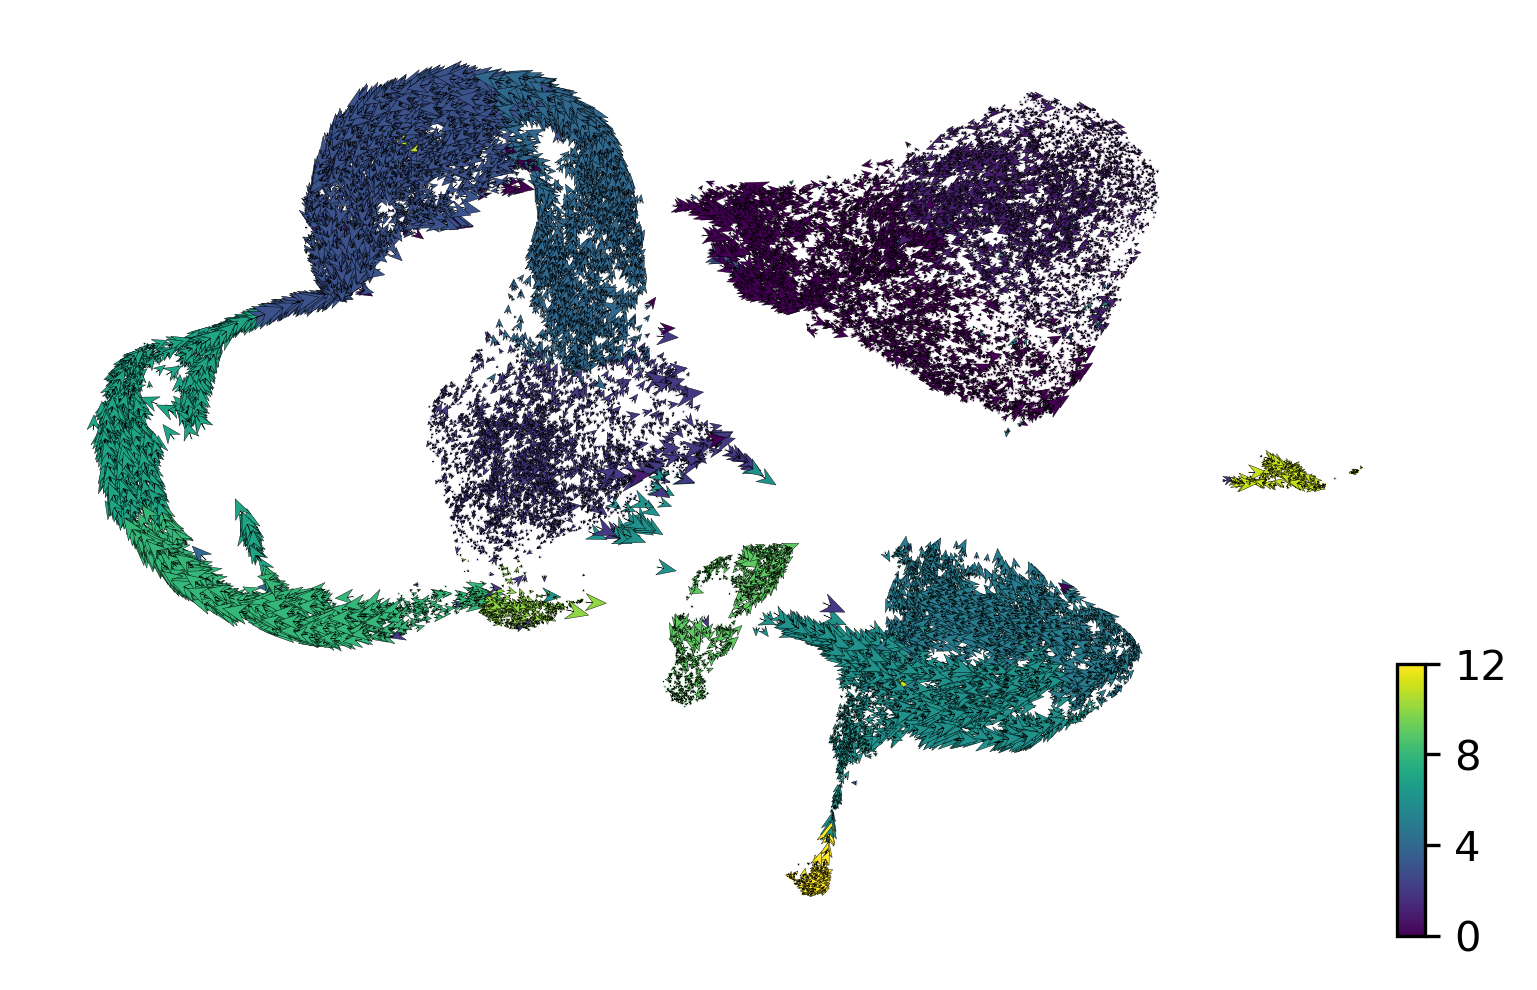

In [163]:
scv.pl.velocity_embedding(BigLoom3, basis = 'umap', color = color, arrow_length=10, arrow_size=10, save = "clusters.png", dpi = 300)

saving figure to file ./figures/scvelo_Velocity.png


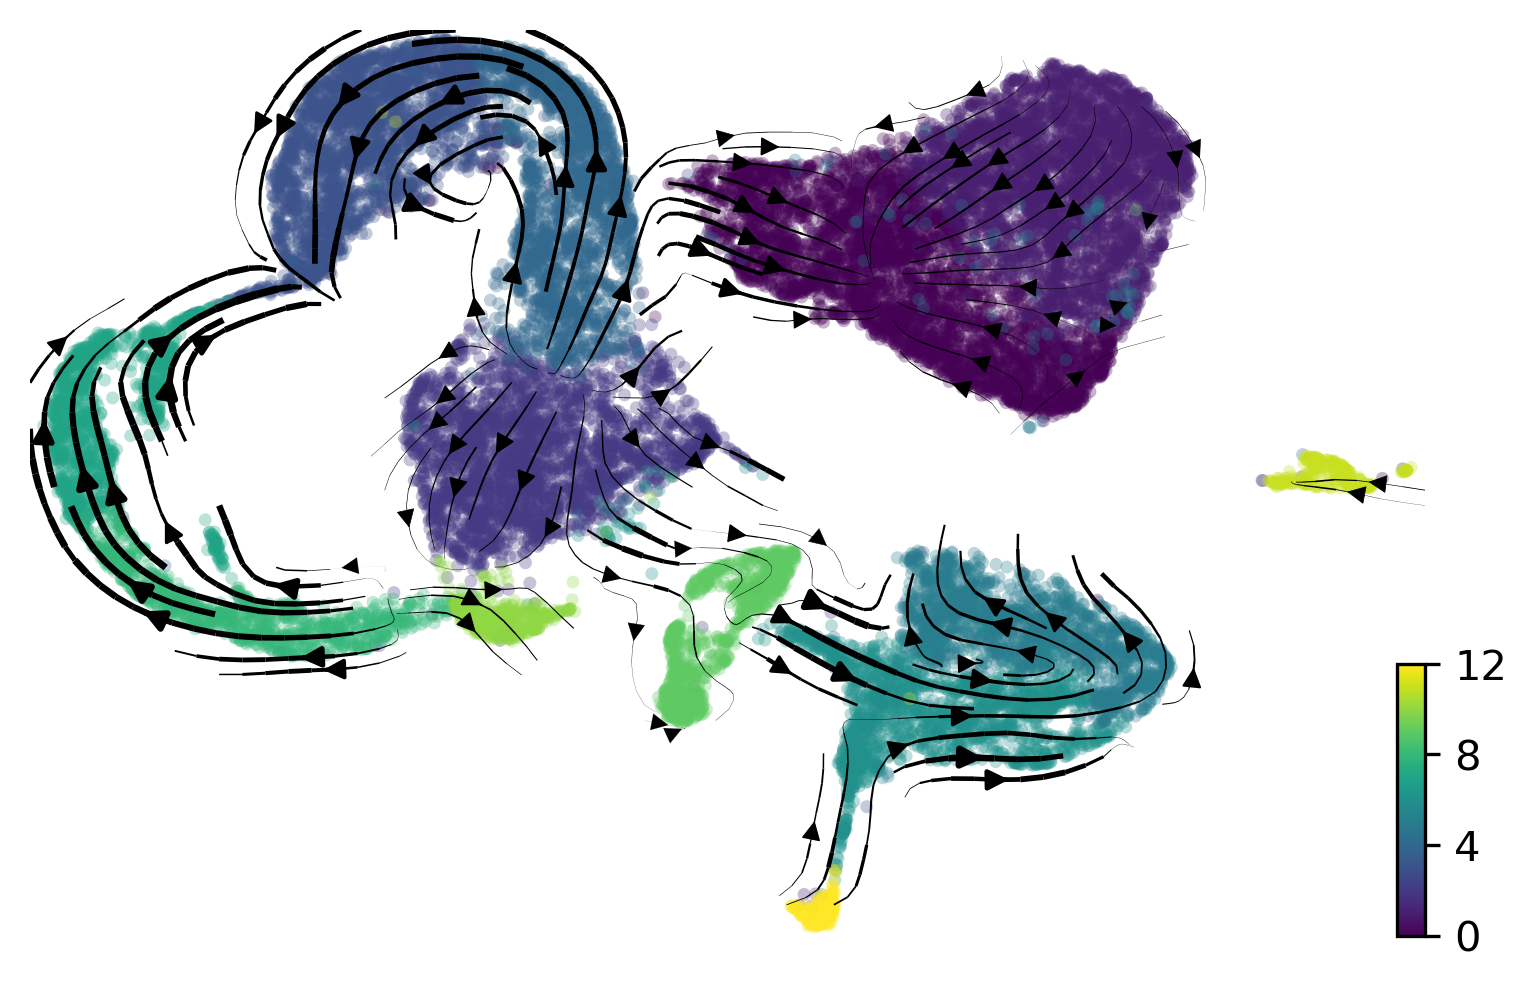

In [164]:
scv.pl.velocity_embedding_stream(BigLoom3, basis='umap', save = "Velocity.png", color = color, dpi=300) #Stream plot of velocities on the embedding.


In [192]:
BigLoom3

AnnData object with n_obs × n_vars = 24823 × 2000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'gene_name', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'X_Clusters', 'pca', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_umap', 'X_pca', 'velocity_umap'
    varm: 'PCs'
    layers: 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

In [196]:
BigLoom3.var_names = BigLoom3.var['gene_name']  # Change the row names to gene symbols

In [197]:
BigLoom3.var

gene_name  gene_count_corr     means  dispersions  \
gene_name                                                              
Cacna1e              Cacna1e          -0.0155  0.000429     1.295484   
Cryba2                Cryba2          -0.0681  0.050803     1.608022   
Prox1                  Prox1          -0.0692  0.023592     1.188871   
Slamf1                Slamf1          -0.0266  0.001886     1.160401   
Cd48                    Cd48          -0.0370  0.008965     0.931831   
...                      ...              ...       ...          ...   
4933407K13Rik  4933407K13Rik          -0.0119  0.002117     0.963583   
Gm14634              Gm14634          -0.0123  0.002297     0.944506   
Gm15232              Gm15232          -0.0209  0.001309     1.016910   
Gm21887              Gm21887          -0.0577  0.058485     0.910493   
Gm47283              Gm47283          -0.1337  0.656498     1.458764   

               dispersions_norm  highly_variable  velocity_gamma  velocity_r2  \
gene_name                                                                       
Cacna1e                1.762711             True        0.112956    -0.058418   
Cryba2                 2.576794             True        0.007403     0.215648   
Prox1                  1.485010             True        0.152293     0.559689   
Slamf1                 1.410853             True        0.097763    -0.006905   
Cd48                   0.815487             True        0.067787    -0.005283   
...                         ...              ...             ...          ...   
4933407K13Rik          0.898193             True        0.546710    -0.675652   
Gm14634                0.848503             True        0.370555    -0.536008   
Gm15232                1.037096             True        0.131856    -0.013628   
Gm21887                0.759906             True        0.092579     0.110843   
Gm47283                1.069140             True        0.192410     0.030910   

               velocity_genes  
gene_name                      
Cacna1e                 False  
Cryba2                   True  
Prox1                    True  
Slamf1                  False  
Cd48                    False  
...                       ...  
4933407K13Rik           False  
Gm14634                 False  
Gm15232                 False  
Gm21887                  True  
Gm47283                  True  

[2000 rows x 9 columns]

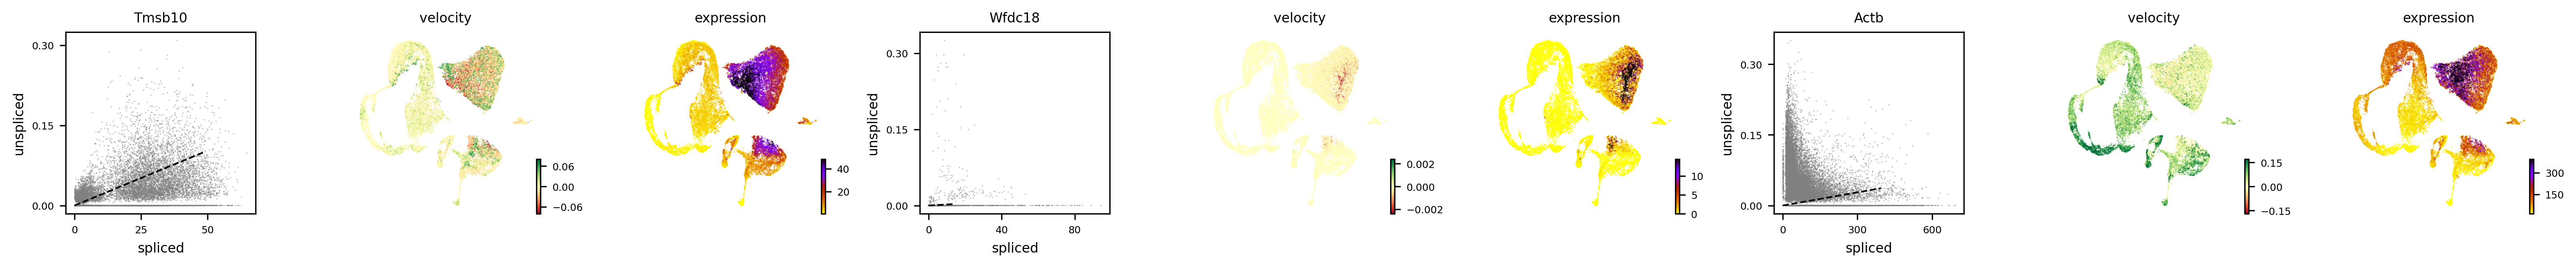

In [204]:
scv.pl.velocity(BigLoom3, ['S100a6',  'Tmsb10', 'Wfdc18', "Actb"], ncols=6, dpi = 300) ##phase portraits of some marker genes


## Identify important genes

In [293]:
scv.tl.rank_velocity_genes(BigLoom3, groupby='clusters', min_corr=.3) #runs a differential velocity t-test and outpus a gene ranking for each cluster

ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


In [294]:
df = scv.DataFrame(BigLoom3.uns['rank_velocity_genes']['names'])

In [295]:
df.head()

0      1         2       3         4              5        6  \
0    Nt5c2  Efna5   Smarcc1  Eps8l3     Enpep         Kcnma1   Kcnma1   
1    Efna5  Nt5c2     Kcnn4    Emp1  Naaladl1       Adamts17  Zdhhc14   
2  Slc10a2    Shf     Uhrf1   Rab30       Sis          Cd200    Sidt1   
3     Egfr   Asz1   Txndc16   Adh6a      Muc3         Dpysl3   Glt1d1   
4    Rims2  Lama5  Tmem131l    Noct     Mep1b  9030622O22Rik    Gm609   

         7       8       9        10       11             12  
0    Anpep   Efna1   Rims2   Cttnbp2     St18  5330417C22Rik  
1  Slc43a2     Ddc  Phldb2     Zfhx3    Zfhx3            Ghr  
2    Cidec   Anpep  Ptprn2  Tmem131l  Txndc16  9030622O22Rik  
3     Aspa  Papss2   Ncam2   Smarcc1    Trpm5          Ramp1  
4   Slc5a1   Enpep   Cadps     Soat1    Itpr2          Spdef

In [302]:
kwargs = dict(frameon=False, size=10, linewidth=1.5,
              add_outline='2, 1, 0')

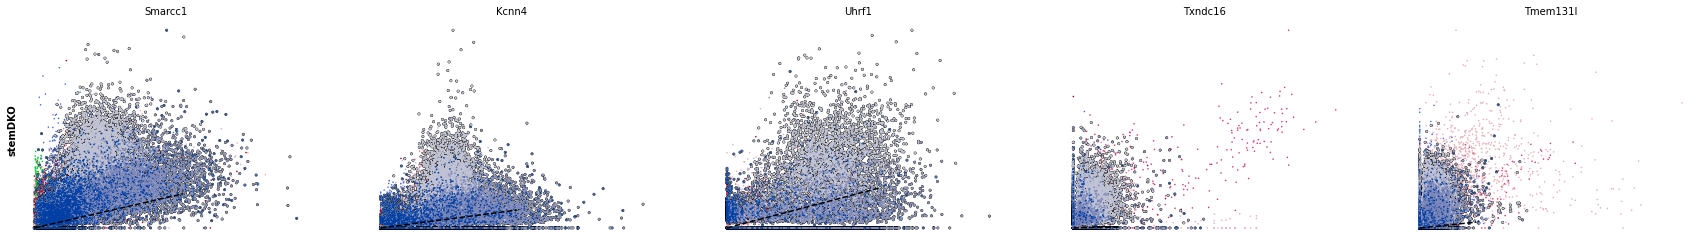

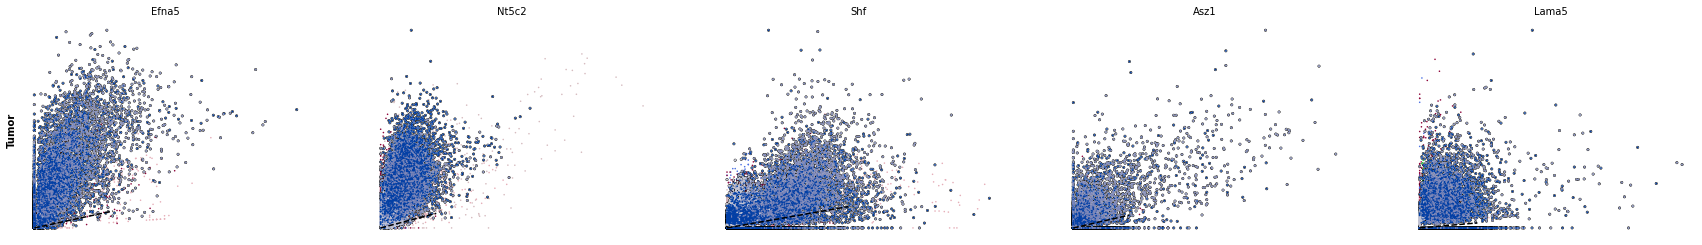

In [304]:
scv.pl.scatter(BigLoom3, df['2'][:5], ylabel='stemDKO', **kwargs)
scv.pl.scatter(BigLoom3, df['1'][:5], ylabel='Tumor', **kwargs)


In [219]:
scv.tl.score_genes_cell_cycle(BigLoom3) ##cell cycle scores (standardized scores of mean expression levels of phase marker genes).


calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


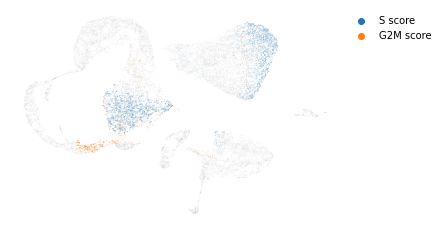

In [220]:
scv.pl.scatter(BigLoom3, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95])

In [221]:
s_genes, g2m_genes = scv.utils.get_phase_marker_genes(BigLoom3)

In [222]:
s_genes = scv.get_df(BigLoom3[:, s_genes], 'spearmans_score', sort_values=True).index

In [223]:
g2m_genes = scv.get_df(BigLoom3[:, g2m_genes], 'spearmans_score', sort_values=True).index

In [228]:
s_genes

Index(['Uhrf1', 'Rrm2'], dtype='object', name='gene_name')

In [229]:
g2m_genes

Index(['Top2a', 'Cenpe', 'Cdk1', 'Mki67', 'Nusap1', 'Cdc20', 'Birc5', 'Cenpa'], dtype='object', name='gene_name')

In [224]:
kwargs = dict(frameon=False, ylabel='cell cycle genes')

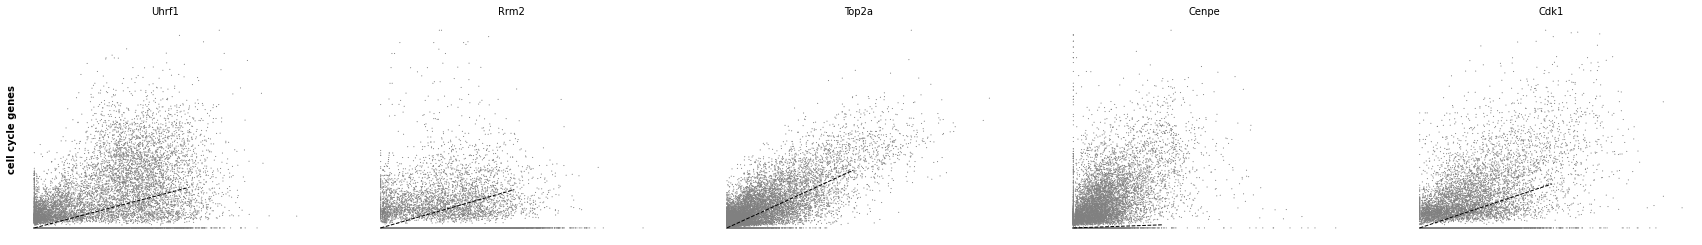

In [225]:
scv.pl.scatter(BigLoom3, list(s_genes[:2]) + list(g2m_genes[:3]), **kwargs)

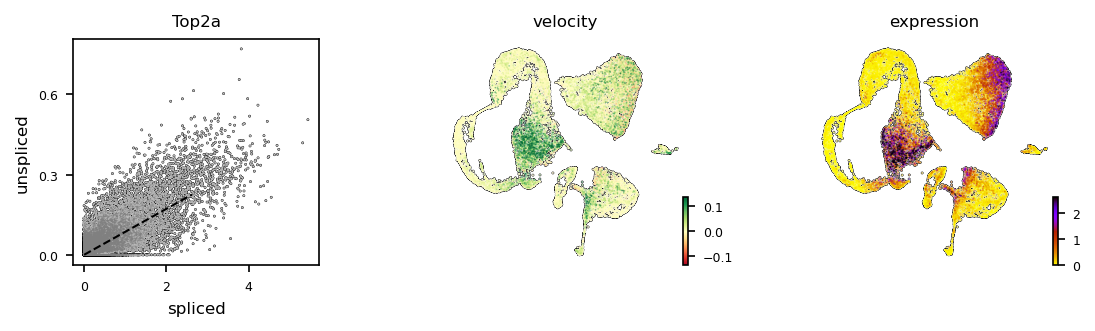

In [227]:
scv.pl.velocity(BigLoom3, ['Hells', 'Top2a'], ncols=2, add_outline=True, dpi = 150)

## Speed and coherence
# The speed or rate of differentiation is given by the length of the velocity vector
# The coherence of the vector field (i.e., how a velocity vector correlates with its neighboring velocities) provides a measure of confidence.

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)


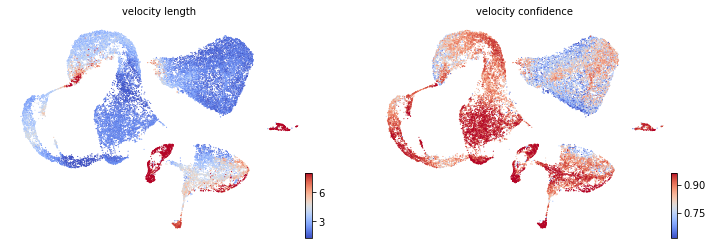

In [307]:
scv.tl.velocity_confidence(BigLoom3)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(BigLoom3, c=keys, cmap='coolwarm', perc=[5, 95])

In [308]:
df = BigLoom3.obs.groupby('clusters')[keys].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

## Velocity graph and pseudotime


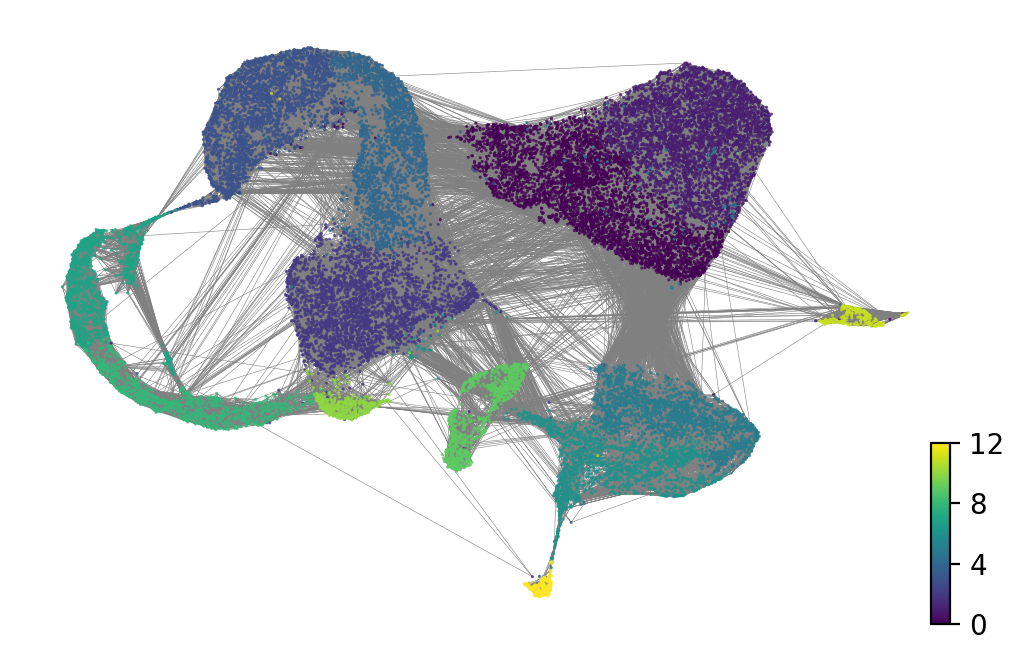

In [232]:
scv.pl.velocity_graph(BigLoom3, threshold=.1, color = color, dpi = 200) # Velocity graph

In [269]:
scv.tl.velocity_pseudotime(BigLoom3) ## Pseudotime

computing terminal states
    identified 7 regions of root cells and 3 regions of end points .
    finished (0:00:04) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


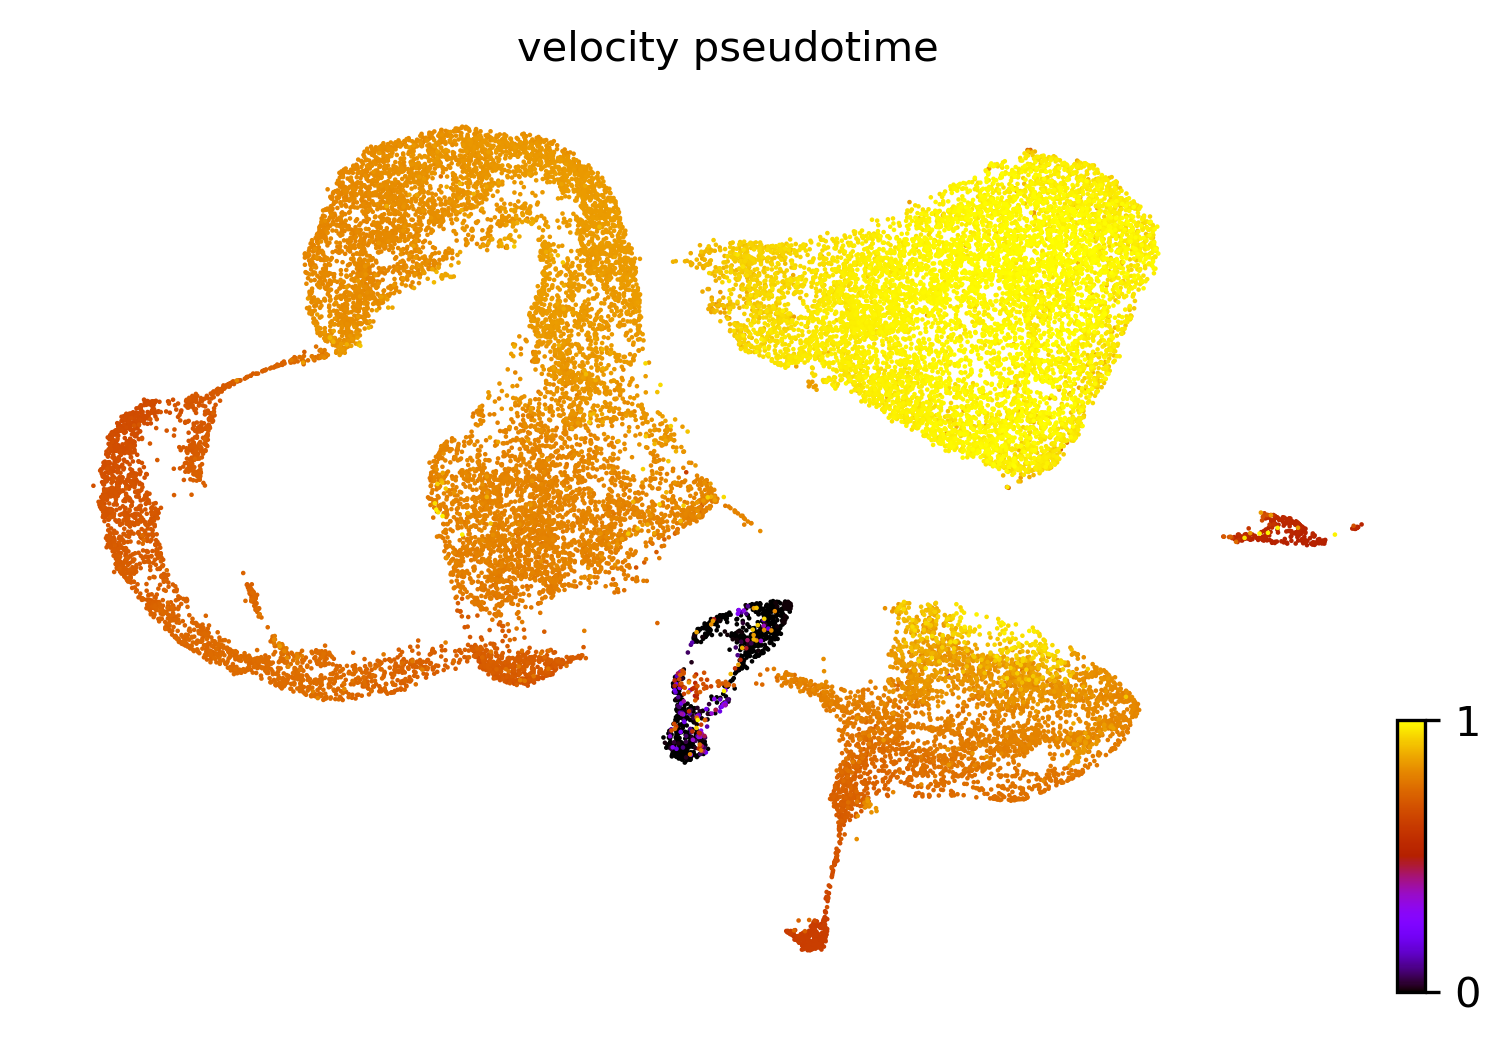

In [271]:
scv.pl.scatter(BigLoom3, color='velocity_pseudotime', cmap='gnuplot', dpi = 300)

### PAGA velocity graph

In [273]:
BigLoom3.uns['neighbors']['distances'] = BigLoom3.obsp['distances']

In [274]:
BigLoom3.uns['neighbors']['connectivities'] = BigLoom3.obsp['connectivities']

In [287]:
scv.tl.paga(BigLoom3, groups='clusters')

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:05) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


In [288]:
df = scv.get_df(BigLoom3, 'paga/transitions_confidence', precision=2).T

In [289]:
df.style.background_gradient(cmap='Blues').format('{:.2g}')

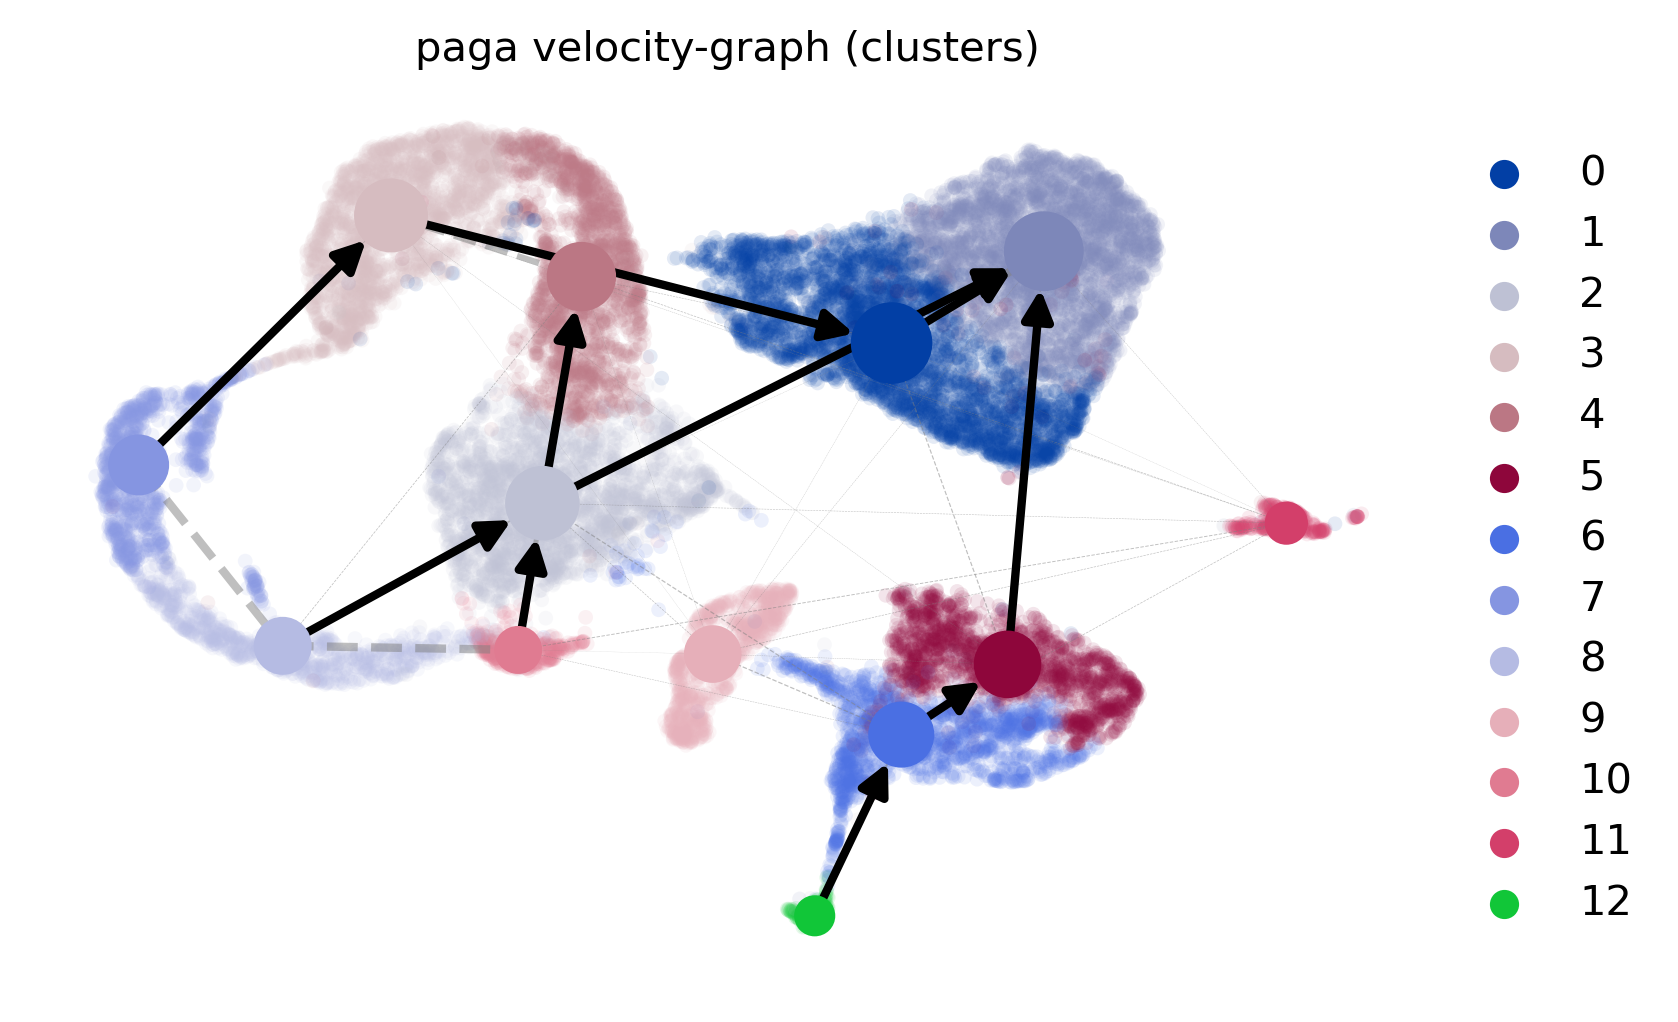

In [291]:
scv.pl.paga(BigLoom3, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5, dpi = 300)